# 一般化線形モデル　ポアソン回帰モデル

Ref. 
 Possion GLM, https://onlinecourses.science.psu.edu/stat504/node/169  
 
$\lambda = \exp(\beta_0+ \beta_1)$

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
FLAG_fig = False

#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0), \hspace{3mm} \beta_1 = 0$ の場合  
平均値をlamとおいた

In [2]:
Num = 1000
lam = 5 # lambda
y = np.random.poisson(lam,Num)

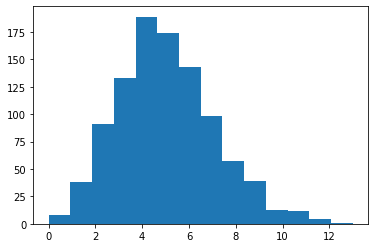

In [3]:
count, bins, ignored = plt.hist(y, 14, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_hist.png')
plt.show()

#### 一部をプロット

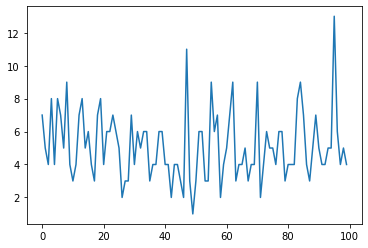

In [4]:
n = 100
plt.plot( y[0:n])

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_plot.png')
plt.show()

一般化線形モデル問題を解く

In [5]:
x = range(len(y))
df = pd.DataFrame({'x':x, 'y':y})

In [18]:
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Tue, 22 Sep 2020   Deviance:                       1035.6
Time:                        15:28:30   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

<ipython-input-18-74585cacf405>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()


In [7]:
b0, b1 = result.params
print('exp(b0) =',np.exp(b0)) 

exp(b0) = 4.868175715776294


In [8]:
print('Mean of y =',df.y.mean())

Mean of y = 4.919


#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0 + \beta_1 x1)$, の場合  

In [9]:
Num = 1000
x = np.zeros(Num)
y = np.zeros(Num)

In [10]:
b0 , b1 = 0.5, 3.5
for i in range(Num):
    x[i] = i
    lam = np.exp( b0 + (b1/float(Num)) * (float(i)))
    y[i] = np.random.poisson(lam,1)

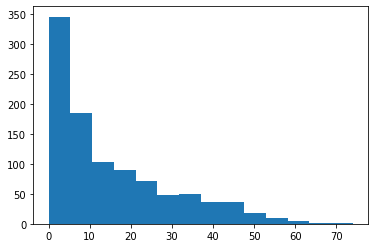

In [11]:
count, bins, ignored = plt.hist(y, 14, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson2_hist.png')
plt.show()

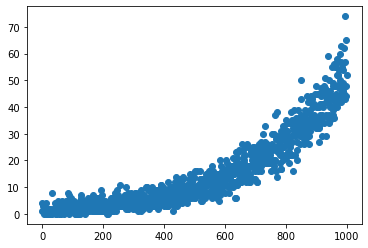

In [12]:
plt.scatter(x, y)

In [13]:
df = pd.DataFrame({'x':x, 'y':y})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Tue, 22 Sep 2020   Deviance:                       1035.6
Time:                        15:24:54   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

<ipython-input-13-ee73e648b4f2>:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()


下記で　b1 = b1 * num としているのは，glmはlamの生成式にある(b1/float(num))を予測しており，この分母を払うため

In [14]:
b0, b1 = result.params
b1 = b1 * Num  # 見掛け上のパラメータの分母に(num)があるため，これを払う
print("b0 = %f  b1 = %f" % (b0,b1))
#e_b0 = np.exp(b0)
#e_b1 = np.exp(b1)
#print("exp(b0) = %f  exp(b1) = %f" % (e_b0, e_b1))

b0 = 0.519759  b1 = 3.469264


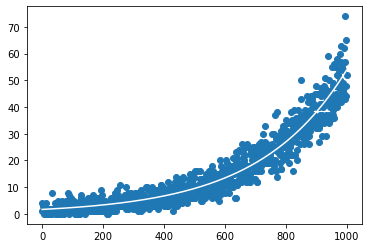

In [15]:
y_pre = np.exp(b0 + (b1/float(Num))*x)
plt.scatter(x[0:Num], y[0:Num])
plt.plot(x, y_pre, color = 'white')

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson2_plot.png')
plt.show()

#### データの前半500個[0:499]と後半500個[500:999]を入れ替える

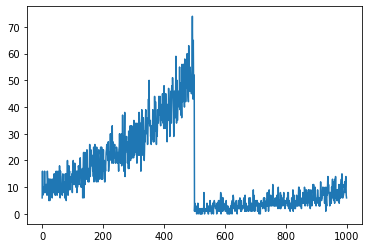

In [16]:
nlen = len(x)
n2 = int(nlen/2)

xx = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
if nlen % 2 == 0: #even
    nst = n2
else:
    nst = n2 + 1
    xx[n2] = x[n2]
    
xx[0:n2] = x[nst:nlen]
xx[nst:nlen]= x[0:n2]
"""
print(xx[0:5])
print(xx[(n2-1):(n2+4)])
print(xx[-5:])
"""
yy = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
yy[0:n2] = y[nst:nlen]
yy[nst:nlen]= y[0:n2]

plt.plot(yy[0:nlen]) # 注意：plot(xx,yy)とすると，先のグラフと同じになる

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson3_plot.png')
plt.show()

In [17]:
df = pd.DataFrame({'x':xx, 'y':yy})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Tue, 22 Sep 2020   Deviance:                       1035.6
Time:                        15:24:54   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

<ipython-input-17-d712deaaee1d>:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
